In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

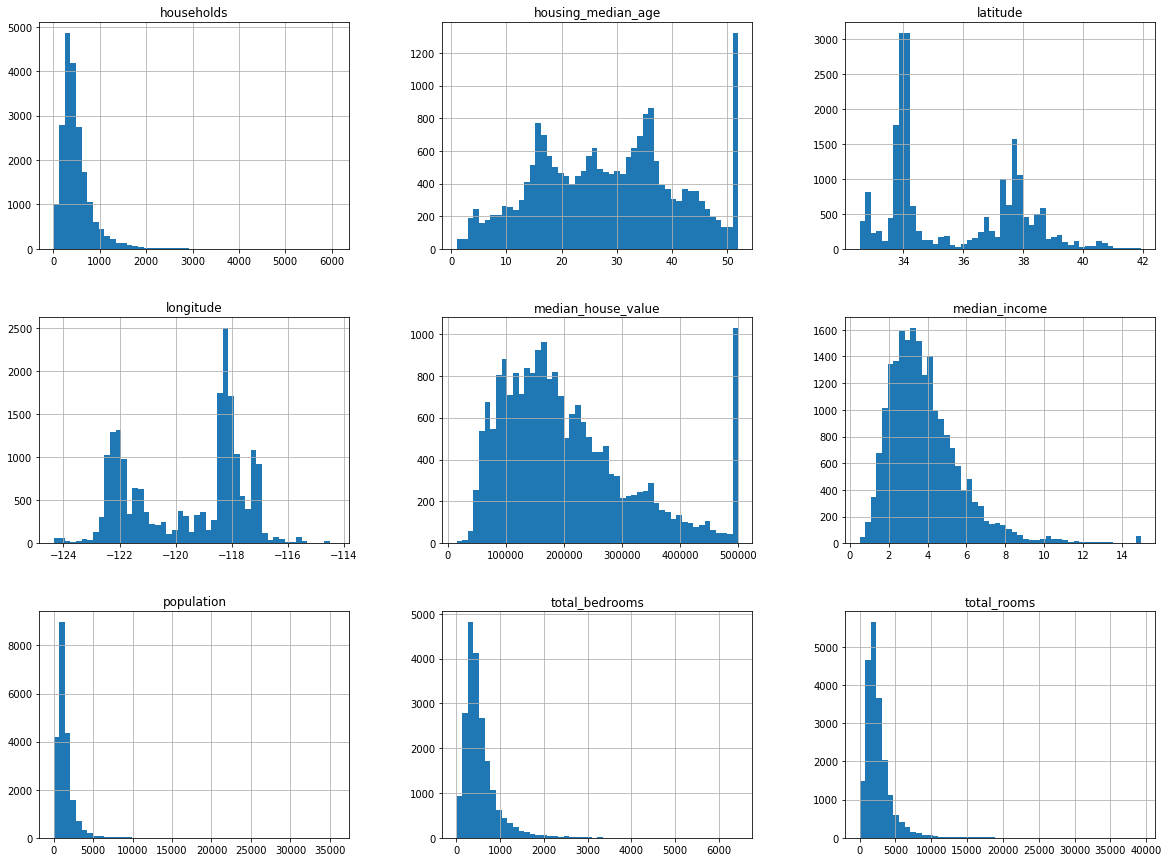

In [55]:
# %matplotlib inline   # only in a Jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
housing["households"].hist(bins=25)

In [57]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [58]:
# create bins to get training data to represent the whole dataset
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

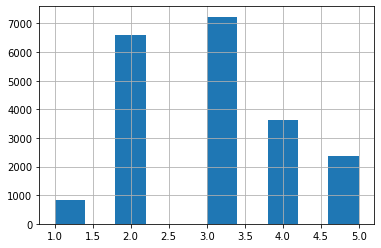

In [59]:
housing["income_cat"].hist()

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

In [61]:
len(housing.index.tolist())

20640

In [63]:
x=ss.split(housing, housing["income_cat"])
list(x)

[(array([  740, 19529,  8613, ..., 10482, 13596,  1318]),
  array([  462, 20384,  2140, ...,  2389, 17194,  6596]))]

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in ss.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
# strat_train_set[1].head()

In [65]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [66]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY,3
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND,5
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN,5
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN,5
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY,2


In [67]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
# After splitting also we are getting almost similar ratios of the income_cat for different categories of the income_cat
# in housing dataset & strat_test_set above
# This happens in StratifiedSplit. In randome split we get lot of skewed results

In [68]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [69]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=1)

In [70]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train)
    print("test\n", X_test)
#     print(X_test)

TRAIN: [1 3 2] TEST: [5 4 0]
[[3 4]
 [7 8]
 [5 6]]
test
 [[11 12]
 [ 9 10]
 [ 1  2]]
TRAIN: [2 1 5] TEST: [3 0 4]
[[ 5  6]
 [ 3  4]
 [11 12]]
test
 [[ 7  8]
 [ 1  2]
 [ 9 10]]
TRAIN: [5 4 2] TEST: [3 1 0]
[[11 12]
 [ 9 10]
 [ 5  6]]
test
 [[7 8]
 [3 4]
 [1 2]]
TRAIN: [3 1 5] TEST: [0 2 4]
[[ 7  8]
 [ 3  4]
 [11 12]]
test
 [[ 1  2]
 [ 5  6]
 [ 9 10]]
TRAIN: [0 5 2] TEST: [3 4 1]
[[ 1  2]
 [11 12]
 [ 5  6]]
test
 [[ 7  8]
 [ 9 10]
 [ 3  4]]


In [71]:
housing = strat_train_set.copy()

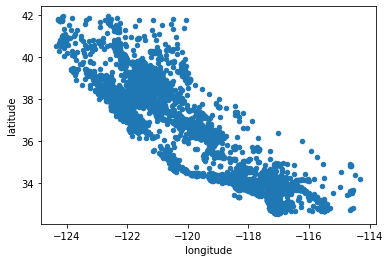

In [72]:
housing.plot(kind="scatter", x="longitude", y="latitude")

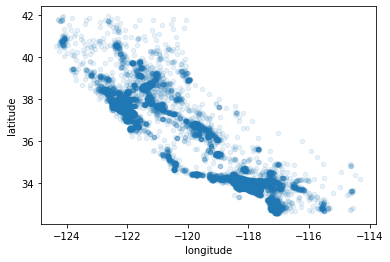

In [73]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

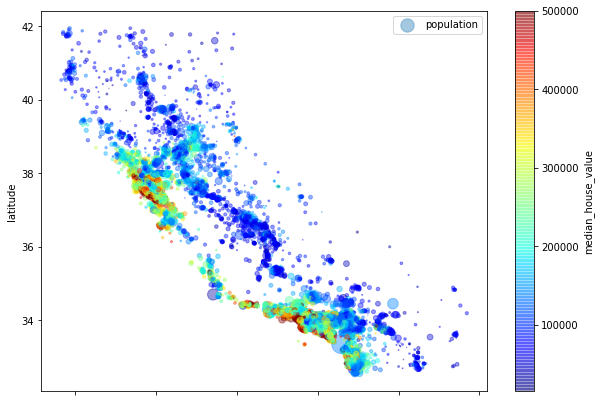

In [74]:
%matplotlib inline 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [75]:
corr_matrix = housing.corr()

In [76]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12587ea20>,
      dtype=object)

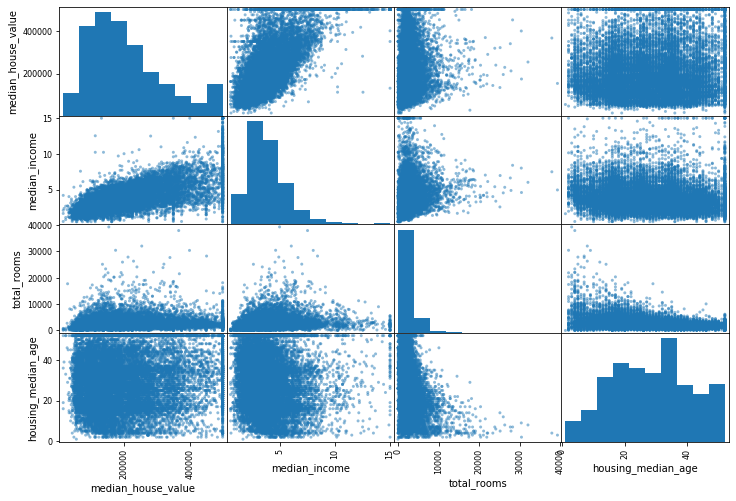

In [77]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
!pip install seaborn

In [79]:
# import seaborn as sns
# ax = sns.heatmap(housing["population"])

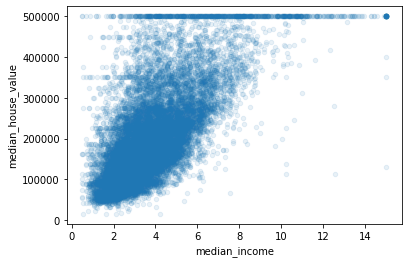

In [80]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

In [81]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [82]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684828
rooms_per_household         0.171947
total_rooms                 0.133566
housing_median_age          0.107684
households                  0.065778
total_bedrooms              0.049941
population                 -0.025008
population_per_household   -0.026596
longitude                  -0.043824
latitude                   -0.146748
bedrooms_per_room          -0.256396
Name: median_house_value, dtype: float64

In [83]:
housing["bedrooms_per_room"] 

740      0.181922
19529    0.149289
8613     0.180973
10142    0.147423
15867    0.251799
7803     0.200532
19996    0.176026
9928     0.217995
12666    0.183453
2873     0.231716
8297     0.257095
19509    0.213640
7698     0.165321
5256     0.135824
8203     0.274621
1609     0.200000
11085    0.224434
11749    0.175856
9200     0.167317
5185     0.227673
15965    0.186076
13031    0.172387
19179    0.129098
2088     0.225905
16132    0.235538
2369     0.216657
5818     0.273292
14080    0.209742
15028    0.215837
15191    0.131952
           ...   
4874     0.506239
5199     0.328217
15840    0.210473
9030     0.156081
12367    0.200149
5450     0.320333
19252         NaN
14059    0.248914
19900    0.247191
2570     0.198621
4736     0.230080
15940    0.206274
20047    0.260870
12708    0.191283
15566    0.135243
4677     0.114708
3127     0.187435
16648    0.227484
18952    0.177668
14148    0.188256
3794     0.193614
6356     0.228225
2920     0.230741
16028    0.208354
6833     0

In [84]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [85]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [86]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312
7803,-118.10,33.90,40.0,1880.0,377.0,1229.0,378.0,4.4167
19996,-119.45,36.16,27.0,2119.0,373.0,1268.0,345.0,2.8152
9928,-122.31,38.30,45.0,3023.0,659.0,1789.0,657.0,3.6039
12666,-121.45,38.48,28.0,2780.0,510.0,1638.0,533.0,2.9571
2873,-118.96,35.37,41.0,1463.0,339.0,1066.0,318.0,1.7467


In [87]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [88]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [89]:
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [90]:
X = imputer.transform(housing_num)

In [91]:
X

array([[-1.2213e+02,  3.7670e+01,  4.0000e+01, ...,  9.1400e+02,
         3.1700e+02,  3.8676e+00],
       [-1.2098e+02,  3.7650e+01,  4.0000e+01, ...,  1.5800e+02,
         6.3000e+01,  7.3841e+00],
       [-1.1837e+02,  3.3870e+01,  2.3000e+01, ...,  8.9100e+02,
         3.5600e+02,  6.5755e+00],
       ...,
       [-1.1769e+02,  3.3580e+01,  5.0000e+00, ...,  2.8770e+03,
         9.8200e+02,  7.5177e+00],
       [-1.1730e+02,  3.4100e+01,  4.9000e+01, ...,  7.6000e+01,
         1.3000e+01,  2.5625e+00],
       [-1.2177e+02,  3.7990e+01,  4.0000e+00, ...,  2.4290e+03,
         7.1600e+02,  5.4409e+00]])

In [92]:
# converting array to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [93]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312
5,-118.10,33.90,40.0,1880.0,377.0,1229.0,378.0,4.4167
6,-119.45,36.16,27.0,2119.0,373.0,1268.0,345.0,2.8152
7,-122.31,38.30,45.0,3023.0,659.0,1789.0,657.0,3.6039
8,-121.45,38.48,28.0,2780.0,510.0,1638.0,533.0,2.9571
9,-118.96,35.37,41.0,1463.0,339.0,1066.0,318.0,1.7467


In [94]:
imputer.strategy

'median'

In [95]:
housing_cat = housing[["ocean_proximity"]]

In [96]:
housing_cat.head(10)

,ocean_proximity
740,NEAR BAY
19529,INLAND
8613,<1H OCEAN
10142,<1H OCEAN
15867,NEAR BAY
7803,<1H OCEAN
19996,INLAND
9928,NEAR BAY
12666,INLAND
2873,INLAND


In [97]:
# changing text attribute to numbers using OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [1.]])

In [98]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [99]:
# changing text attribute to numbers using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [100]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [101]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [102]:
housing.values

array([[-122.13, 37.67, 40.0, ..., 317.0, 3.8676, 'NEAR BAY'],
       [-120.98, 37.65, 40.0, ..., 63.0, 7.3841, 'INLAND'],
       [-118.37, 33.87, 23.0, ..., 356.0, 6.5755, '<1H OCEAN'],
       ...,
       [-117.69, 33.58, 5.0, ..., 982.0, 7.5177, '<1H OCEAN'],
       [-117.3, 34.1, 49.0, ..., 13.0, 2.5625, 'INLAND'],
       [-121.77, 37.99, 4.0, ..., 716.0, 5.4409, 'INLAND']], dtype=object)

In [103]:
# creating your custom fit-transform class
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# attr_adder = CombinedAttributesAdder()
# attr_adder.set_params(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [104]:
# fit_transform can be used instead pf fir method above
attr_adder.fit_transform(housing.values)

array([[-122.13, 37.67, 40.0, ..., 'NEAR BAY', 5.514195583596215,
        2.8832807570977916],
       [-120.98, 37.65, 40.0, ..., 'INLAND', 6.698412698412699,
        2.507936507936508],
       [-118.37, 33.87, 23.0, ..., '<1H OCEAN', 5.137640449438202,
        2.502808988764045],
       ...,
       [-117.69, 33.58, 5.0, ..., '<1H OCEAN', 6.80040733197556,
        2.9297352342158858],
       [-117.3, 34.1, 49.0, ..., 'INLAND', 4.615384615384615,
        5.846153846153846],
       [-121.77, 37.99, 4.0, ..., 'INLAND', 7.853351955307263,
        3.392458100558659]], dtype=object)

In [106]:
# Feature Scaling: min-max scaling and standardization
# MinMaxScaler
# StandardScaler

# creating pipeline for the numerical featues
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
housing_num_tr

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.04435599,
        -0.01693693, -0.49175254],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.56563549,
        -0.05135459, -0.99646009],
       [ 0.59827896, -0.82368426, -0.45394013, ..., -0.12139949,
        -0.05182477, -0.5064297 ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.61053242,
        -0.01267723, -0.96392659],
       [ 1.13229471, -0.71606022,  1.61138426, ..., -0.35129083,
         0.25474742, -0.46992773],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  1.0740272 ,
         0.02975272, -1.15998515]])

In [108]:
# create full pipeline for all the housing data
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [109]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [112]:
# columns can be fetched in various ways
list(housing_num) == list(housing_num.columns) == housing_num.columns.tolist()

True

In [113]:
# Training and Evaluating on the Training Set

#Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
some_data = housing.iloc[:5]

In [115]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY


In [116]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
740,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY
19529,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND
8613,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN
10142,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,<1H OCEAN
15867,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY


In [117]:
some_labels = housing_labels.iloc[:5]

In [118]:
# apply pipeline to the test data
some_data_prepared = full_pipeline.transform(some_data)

In [119]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [234956.84260842 303073.513104   327746.46204573 355932.30741583
 210220.50294171]


In [120]:
some_labels

740      184000.0
19529    172200.0
8613     359900.0
10142    258200.0
15867    239100.0
Name: median_house_value, dtype: float64

In [121]:
# Calculate Root Mean Squared Error(RMSE)
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
# print(housing_predictions[:5])
# print(housing_labels[:5])
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68860.85279166883

In [122]:
#DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [123]:
housing_predictions = tree_reg.predict(housing_prepared)

In [124]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

In [125]:
# Better Evaluation Using Cross-Validation
# Scikit-Learn’s K-fold cross-validation feature
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [127]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [128]:
# calculate decisiontree scores
display_scores(tree_rmse_scores)

Scores: [72747.12003435 71364.76687081 71136.64607685 69394.48310607
 72880.16263232 68159.17847375 73901.09080119 69223.92978267
 71308.81971336 70828.79548383]
Mean: 71094.49929751948
Standard deviation: 1702.740470019885


In [131]:
# calculate linearregression scores
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70987.24786319 66375.29508519 73837.53789445 69493.59584642
 69821.05544742 69047.06162451 65908.72602507 66979.33032669
 73036.00622233 67077.50225384]
Mean: 69256.33585891138
Standard deviation: 2610.121268165483


In [132]:
# RandomForest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

/Users/abhishek/anaconda/envs/hello-tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [133]:
housing_predictions = forest_reg.predict(housing_prepared)

In [142]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22292.147280664056

In [145]:
# calculate randomforestregressor scores
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [146]:
display_scores(forest_rmse_scores)

Scores: [53853.88748942 50075.3705433  50466.02814331 53678.8222175
 53325.19628437 52043.85517818 52383.05285064 50855.35653156
 56285.56387813 53744.07300891]
Mean: 52671.120612531275
Standard deviation: 1800.8730476457881
